In [ ]:
from img2table.ocr import TesseractOCR
from img2table.ocr import PaddleOCR
from img2table.document import Image
import matplotlib.pyplot as plt
import cv2

In [215]:

# Instantiation of OCR
ocr_tes = TesseractOCR(n_threads=1, lang="eng+ind")
ocr_pad = PaddleOCR(lang="id",
                kw={'layout':False, 'show_log':True, 'ocr':True})

In [222]:
def draw_bounding_box(image, tables):
    result = image.copy()
    for table in tables:
        for cell in table.content:
            for group in table.content[cell]:
                # Get bounding box coordinates
                
                x_min, y_min, x_max, y_max = (group.bbox.x1, group.bbox.y1, group.bbox.x2, group.bbox.y2)
                
                # Draw the rectangle on the image
                color = (0, 255, 0)  # Green color for the box
                thickness = 2  # Thickness of the rectangle
                cv2.rectangle(result, (x_min, y_min), (x_max, y_max), color, thickness)
    return result

In [235]:
IMAGE_PATH = "IMG-20240528-WA0015 - Copy.jpg"
image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
# Instantiation of document, either an image or a PDF
doc = Image(IMAGE_PATH, detect_rotation=True)

In [236]:
# Table extraction
extracted_tables_tes = doc.extract_tables(ocr= ocr_tes, implicit_rows= True, implicit_columns= True,
                       borderless_tables= True, min_confidence= 70)

In [237]:
extracted_tables_pad = doc.extract_tables(ocr= ocr_pad, implicit_rows= True, implicit_columns= True,
                       borderless_tables= True, min_confidence= 70)

                   0     1     2
0        Lemak Total    6g  8 Yo
1        Lemak Jenuh  1.59   8 %
2            Protein     2    3%
3  Karbohidrat Total  13 g    4%
4       Serat Pangan    1g    3%
5               Gula     g  None
6    Garam (Natrium)    mg    3%


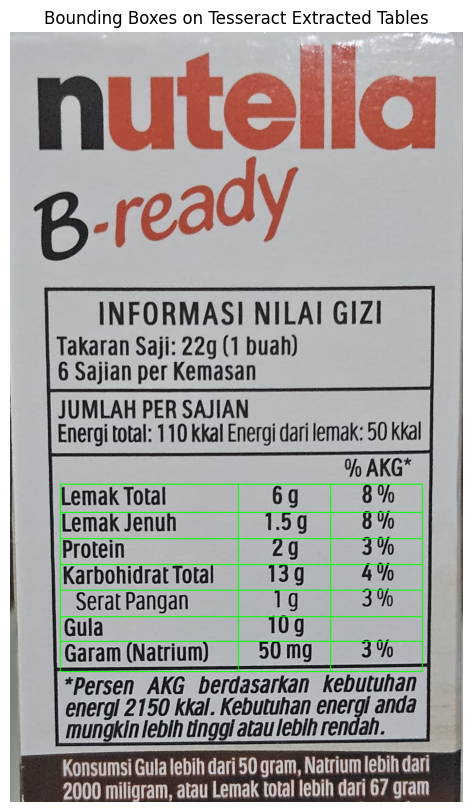

In [238]:
for table in extracted_tables_tes:
    print(table.df)

plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(draw_bounding_box(image, extracted_tables_tes))
plt.axis('off')  # Hide axes for cleaner visualization
plt.title("Bounding Boxes on Tesseract Extracted Tables")
plt.show()

                   0     1     2
0        Lemak Total    6g    8%
1        Lemak Jenuh  1.5g    8%
2            Protein    2g    3%
3  Karbohidrat Total   13g    4%
4       Serat Pangan    1g    3%
5               Gula   10g  None
6     Garam(Natrium)  50mg    3%


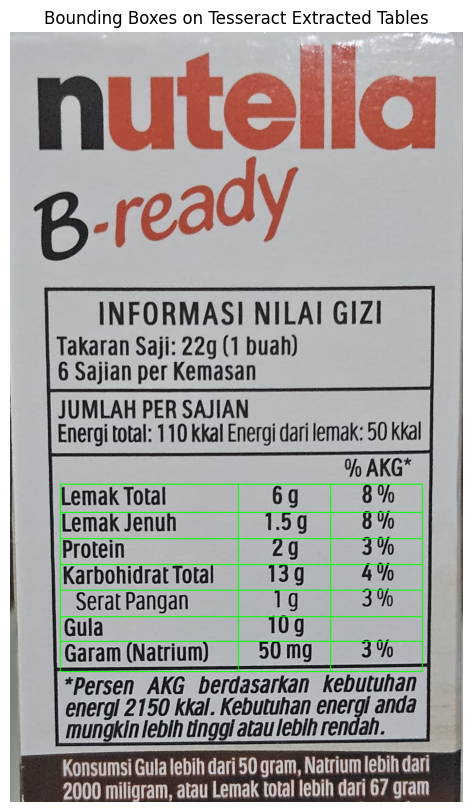

In [239]:
for table in extracted_tables_pad:
    print(table.df)

plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(draw_bounding_box(image, extracted_tables_pad))
plt.axis('off')  # Hide axes for cleaner visualization
plt.title("Bounding Boxes on Tesseract Extracted Tables")
plt.show()